<a href="https://www.kaggle.com/code/kbhuvana202006/task-2?scriptVersionId=296046527" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Using K-means clustering, customers were grouped into five distinct segments based on annual income and spending behavior. The Elbow Method identified the optimal number of clusters. The resulting segments revealed patterns such as high-income high-spending customers, budget-conscious customers, and average shoppers. This segmentation can help retail businesses design targeted marketing strategies.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [2]:
pip install pandas numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
data_path = "/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv"

df = pd.read_csv(data_path)

print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


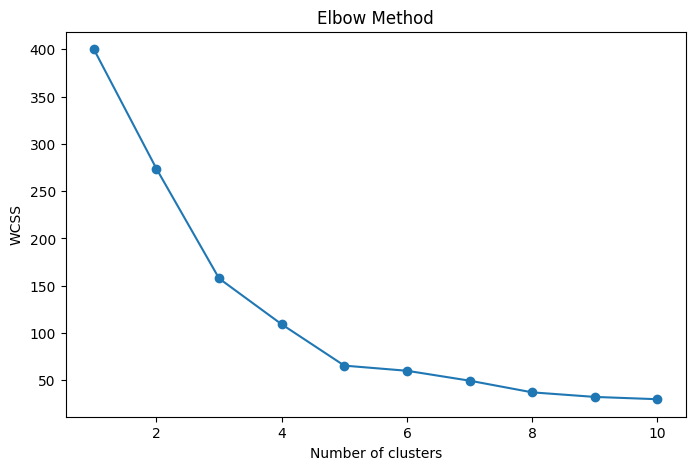

In [7]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


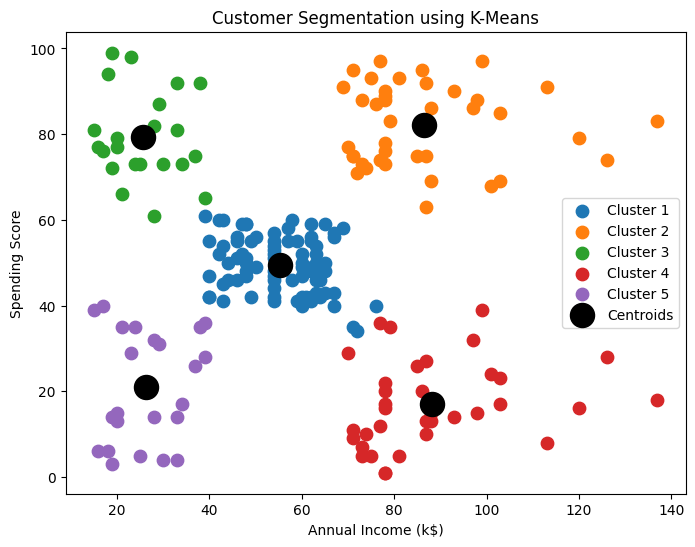

In [9]:
plt.figure(figsize=(8,6))

for i in range(5):
    plt.scatter(
        X.iloc[clusters == i, 0],
        X.iloc[clusters == i, 1],
        label=f'Cluster {i+1}',
        s=80
    )

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], s=300, c='black', label='Centroids')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()


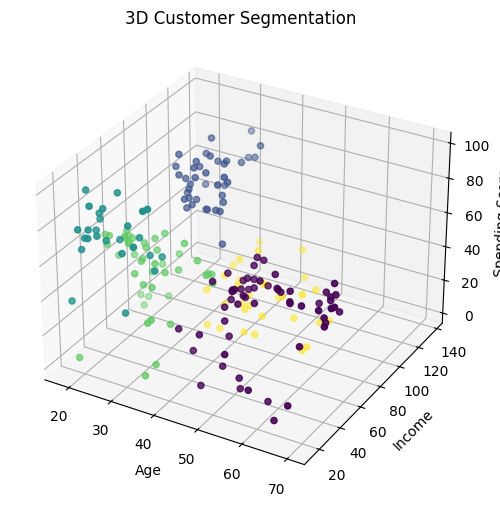

In [10]:
from mpl_toolkits.mplot3d import Axes3D

X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X3_scaled = scaler.fit_transform(X3)

kmeans3 = KMeans(n_clusters=5, random_state=42)
clusters3 = kmeans3.fit_predict(X3_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X3['Age'], 
    X3['Annual Income (k$)'], 
    X3['Spending Score (1-100)'],
    c=clusters3
)

ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Spending Score")
ax.set_title("3D Customer Segmentation")
plt.show()


In [11]:
df.groupby('Cluster').mean(numeric_only=True)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,86.320988,42.716049,55.296296,49.518519
1,162.000000,32.692308,86.538462,82.128205
2,23.090909,25.272727,25.727273,79.363636
3,164.371429,41.114286,88.200000,17.114286
4,23.000000,45.217391,26.304348,20.913043


In [12]:
df.to_csv("segmented_customers.csv", index=False)
pd.read_csv("segmented_customers.csv").head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [13]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

print(cluster_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


In [14]:
df['Cluster'].value_counts()


Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64